# 实现Dropout层


In [ ]:
import torch
from torch import nn

In [ ]:
def dropout_layer(X,dropout):
  assert( 0 <= dropout <= 1)
  if dropout == 0:
    return X
  elif dropout == 1:
    return torch.zeros_like(X)
  mask = (torch.rand(X.shape) > dropout).float()
  # mask = (torch.Tensor(X.shape).uniform_(0, 1) > dropout).float()
  print(mask)
  return mask * X / (1.0 - dropout)

In [ ]:
X = torch.randn((3,6))
X

tensor([[-1.6150, -2.2854,  0.6640,  0.7981, -1.4307, -0.4248],
        [ 1.0732, -0.0928, -0.8521, -1.2028, -0.0602,  1.5991],
        [ 1.6713,  0.5543, -1.2192, -0.3534,  0.9233, -1.1061]])

In [ ]:
dropout_layer(X,0.5)

tensor([[0., 1., 1., 1., 1., 1.],
        [0., 1., 0., 0., 0., 1.],
        [0., 0., 1., 1., 0., 0.]])


tensor([[-0.0000, -4.5707,  1.3280,  1.5962, -2.8615, -0.8497],
        [ 0.0000, -0.1855, -0.0000, -0.0000, -0.0000,  3.1981],
        [ 0.0000,  0.0000, -2.4383, -0.7068,  0.0000, -0.0000]])

In [ ]:
print(dropout_layer(X, 1.))

tensor([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]])


In [ ]:
torch.rand(X.shape)

tensor([[0.8293, 0.1727, 0.0232, 0.4631, 0.3115, 0.5253],
        [0.5263, 0.0582, 0.8721, 0.5009, 0.8962, 0.5152],
        [0.2563, 0.6574, 0.0924, 0.2577, 0.0137, 0.0310]])

# 实现权重衰减

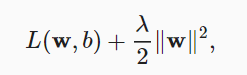

In [ ]:
def l2_penalty(w):
  return torch.sum(w.pow(2)) / 2 

In [ ]:
# l = loss(net(X),y) + lambd * l2_penalty(w)
# l.sum()

In [ ]:
# 测试 torch.sum()
import torch
a = torch.randn(4, 4)
a

tensor([[-0.3599, -1.0468, -0.5424, -0.2074],
        [ 0.5998,  0.5979, -0.3749,  0.4901],
        [ 2.0278,  1.1841, -0.2951,  0.4429],
        [-0.6421,  1.2200, -0.3020, -0.1860]])

In [ ]:
torch.sum(a, 1)

tensor([-2.1566,  1.3130,  3.3597,  0.0899])

In [ ]:
torch.sum(a, 0)

tensor([ 1.6256,  1.9552, -1.5145,  0.5397])

In [ ]:
torch.sum(a)

tensor(2.6060)

# **实现BatchNorm**

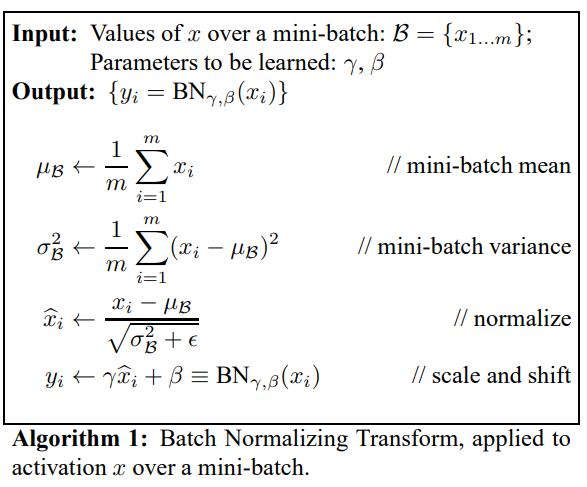

In [ ]:
import torch 
from torch import nn

In [ ]:
def batch_norm( X , gamma , beta , moving_mean, moving_var ,eps,momentum):
  if not torch.is_grad_enabled():
    X_hat = (X - moving_mean) / torch.sqrt(moving_var + eps)
  else:
    assert len(X.shape) in (2,4)
    if len(X.shape)==2:
      mean = X.mean(dim=0,keepdim=True)
      var = torch.square(X-mean).mean(keep=0,keepdim=True)
    else:
      mean = X.mean(dim=1,keepdim=True)
      var = torch.square(X-mean).mean(dim=(0,2,3),keepdim=True)
    X_hat = (X-mean) / torch.sqrt(var+eps)
    moving_mean = momentum * moving_mean + (1.0 - momentum) * mean
    moving_var = momentum * moving_var + (1.0 - momentum) * var
  Y = gamma * X_hat + beta
  return Y,moving_mean.data, moving_var.data

In [ ]:
from torch import nn

In [ ]:
class BatchNorm(nn.Module):
  def __init__(self,num_features,num_dims):
    super(BatchNorm,self).__init__()
    if num_dims == 2:
      shape = (1,num_features)
    else:
      shape = (1,num_features,1,1)
    self.beta = nn.Parameter(torch.zeros(shape))
    self.gamma = nn.Parameter(torch.ones(shape))

    self.moving_var = torch.zeros(shape)
    self.moving_mean = torch.ones(shape)
  def forward(self,X):
    print(X.device,'\t',self.moving_mean.device)

    if self.moving_mean.device != X.device:
      self.moving_mean = self.moving_mean.to(X.device)
      self.moving_var = self.moving_var.to(X.device)
    Y , self.moving_mean , self.moving_var = batch_norm(
            X, self.gamma, self.beta, self.moving_mean, self.moving_var,
            eps=1e-5, momentum=0.9)
    return Y

In [ ]:
net = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5), BatchNorm(6, num_dims=4),
                    nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Conv2d(6, 16,
                              kernel_size=5), BatchNorm(16, num_dims=4),
                    nn.Sigmoid(), nn.MaxPool2d(kernel_size=2, stride=2),
                    nn.Flatten(), nn.Linear(16 * 4 * 4, 120),
                    BatchNorm(120, num_dims=2), nn.Sigmoid(),
                    nn.Linear(120, 84), BatchNorm(84, num_dims=2),
                    nn.Sigmoid(), nn.Linear(84, 10))

In [ ]:
torch.ones(3,3)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
nn.Conv2d(3, 3, 3, 1, 1)

Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [ ]:
X = torch.rand(1,1,224,224)
net(X)
# 证明定义的BatchNorm层可以用

cpu 	 cpu
cpu 	 cpu


RuntimeError: ignored

## 测试tensor

In [ ]:
X = torch.rand(1,1)
X

tensor([[0.8427]])

In [ ]:
X = torch.tensor(data =[3.,1.],requires_grad = True)
X

tensor([3., 1.], requires_grad=True)

In [ ]:
X.data

tensor([3., 1.])

## 测试 nn.ModuleList and nn.Sequential

In [ ]:
import torch 
from torch import nn

In [ ]:

a = nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)
b = nn.ModuleList([a])
c = nn.Sequential(b)

In [ ]:
c(X_test)

TypeError: ignored

In [ ]:
b

ModuleList(
  (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
)

In [ ]:
b.append(nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False))
b

ModuleList(
  (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
)

In [ ]:
type(b)

torch.nn.modules.container.ModuleList

In [ ]:
type(c)

torch.nn.modules.container.Sequential

In [ ]:
c.add_module('1',b)

In [ ]:
c

Sequential(
  (0): ModuleList(
    (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (1): ModuleList(
    (0): Conv2d(1, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
)

In [ ]:
X_test = torch.rand((1,1,224,224))


TypeError: ignored

In [ ]:
X_test

tensor([[[[0.0848, 0.4739, 0.3459,  ..., 0.0768, 0.1822, 0.3151],
          [0.6564, 0.6627, 0.9479,  ..., 0.4473, 0.8431, 0.1064],
          [0.6199, 0.0383, 0.8721,  ..., 0.7379, 0.4894, 0.3899],
          ...,
          [0.4206, 0.7855, 0.5556,  ..., 0.8957, 0.3131, 0.8223],
          [0.0679, 0.4936, 0.7811,  ..., 0.4968, 0.5216, 0.6893],
          [0.9408, 0.5827, 0.0912,  ..., 0.5949, 0.6964, 0.2232]]]])

In [ ]:
nn.Conv2d(1, 1, kernel_size=3, padding=1, bias=False)(X_test)

tensor([[[[ 0.1086,  0.1781,  0.2612,  ..., -0.0107,  0.2086,  0.0885],
          [ 0.3927,  0.1748,  0.5682,  ...,  0.3244,  0.3198,  0.0824],
          [ 0.2304,  0.3529,  0.7319,  ...,  0.4044,  0.4111,  0.4276],
          ...,
          [ 0.2153,  0.3920,  0.5362,  ...,  0.6032,  0.3368,  0.6211],
          [ 0.2446,  0.5000,  0.4977,  ...,  0.3667,  0.6144,  0.3382],
          [ 0.3648,  0.1846,  0.2445,  ...,  0.3175,  0.4020,  0.1992]]]],
       grad_fn=<MkldnnConvolutionBackward>)

## enumerate and iterable

In [ ]:
list = [1,2,3]
list.__iter__()

In [ ]:
list = [1,2,3]
list.__iter__()

In [ ]:
for i in enumerate(list):
  print(i,'\t')

(0, 1) 	
(1, 2) 	
(2, 3) 	


# 测试方法参数列表

In [66]:
import torch

In [67]:
def ones_like(input, *, dtype=None, layout=None, device=None, requires_grad=False):
  print(input,dtype,layout, device, requires_grad)

In [72]:
ones_like(1,2)

TypeError: ignored

In [71]:
ones_like(1,dtype=2)

1 2 None None False


In [74]:
def ones(*size, *, dtype=None, layout=None, device=None, requires_grad=False):
  print(size,dtype,layout, device, requires_grad)

SyntaxError: ignored

In [73]:
ones(1,2,3,4)

NameError: ignored

In [75]:
def ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None):
  print(size,out,dtype, device)

SyntaxError: ignored